Часть A — Загрузка и первичный обзор

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Winter_Fashion_Trends_Dataset (1).csv')

print('Первые 5 строк:')
print(df.head())
print('Последние 5 строк:')
print(df.tail())

print('Общая информация (структура, типы, пропуски):')
print(df.info())

print('Типы данных по столбцам:')
print(df.dtypes)


Первые 5 строк:
   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  
Последние 5 строк:
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango  

Часть B — Обработка данных

In [7]:
print('Пропущенные значения по столбцам:')
missing = df.isnull().sum()
print(missing)

df = df.dropna().reset_index(drop=True)

duplicates_count = df.duplicated().sum()
print(f'Количество дублирующихся строк: {duplicates_count}')
df = df.drop_duplicates().reset_index(drop=True)

df['price_zscore'] = np.abs((df['Price(USD)'] - df['Price(USD)'].mean()) / df['Price(USD)'].std())
outliers = df[df['price_zscore'] > 3]

print('Описательная статистика числовых признаков:')
print(df.describe())

print('Распределение Trend_Status:')
print(df['Trend_Status'].value_counts())

print('Корреляционная матрица числовых столбцов:')
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
print(corr_matrix)

Пропущенные значения по столбцам:
ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
price_zscore        0
dtype: int64
Количество дублирующихся строк: 0
Описательная статистика числовых признаков:
               ID  Price(USD)  Popularity_Score  Customer_Rating  price_zscore
count  150.000000  150.000000        150.000000       150.000000    150.000000
mean    75.500000  443.105933          5.763333         3.802667      0.840883
std     43.445368  211.630074          2.655763         0.719428      0.536815
min      1.000000   30.070000          1.100000         2.500000      0.003619
25%     38.250000  292.807500          3.400000         3.125000      0.361898
50%     75.500000  445.820000          5.850000         3.800000      0.866602
75%    112.750000  631.537500       

 Часть C — Визуализация данных

Text(0, 0.5, 'Частота')

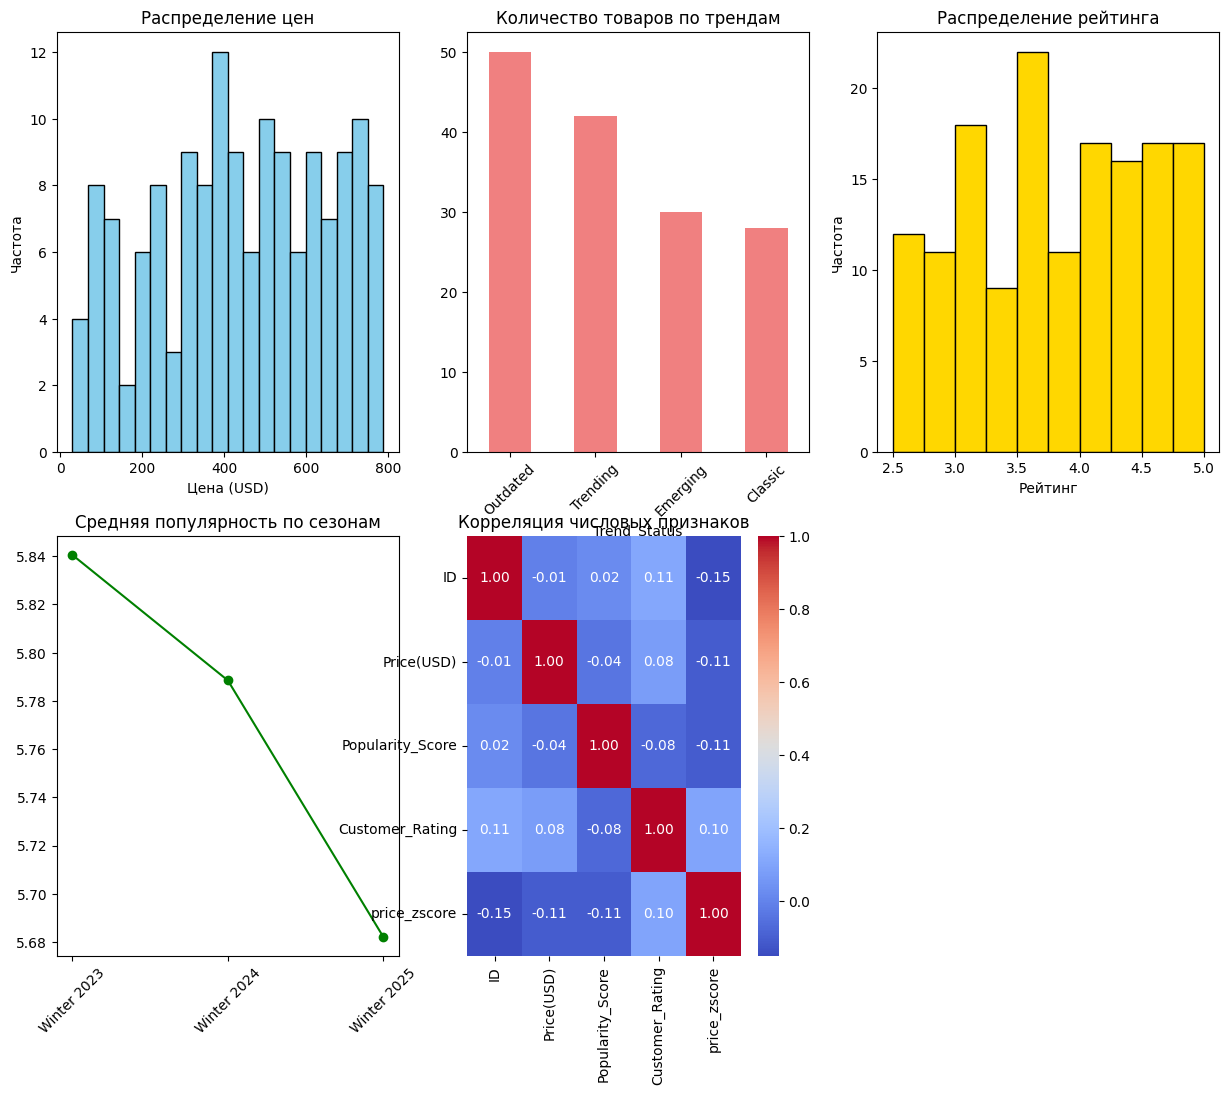

In [16]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.hist(df['Price(USD)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение цен')
plt.xlabel('Цена (USD)')
plt.ylabel('Частота')

plt.subplot(2, 3, 2)
df['Trend_Status'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Количество товаров по трендам')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
season_pop = df.groupby('Season')['Popularity_Score'].mean().reset_index()
plt.plot(season_pop['Season'], season_pop['Popularity_Score'], marker='o', color='green')
plt.title('Средняя популярность по сезонам')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция числовых признаков')

plt.subplot(2, 3, 3)
plt.hist(df['Customer_Rating'], bins=10, color='gold', edgecolor='black')
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

Часть D — Группировки и агрегации

In [14]:
brand_stats = df.groupby('Brand').agg({
    'Price(USD)': 'mean',
    'Customer_Rating': 'median'
}).round(2)
print('Средняя цена и медианный рейтинг по брендам:')
print(brand_stats.head(10))

count_by_season_gender = df.groupby(['Season', 'Gender']).size()
print('Количество товаров по сезону и гендеру:')
print(count_by_season_gender)

pivot = pd.pivot_table(
    df,
    values='Popularity_Score',
    index='Category',
    columns='Trend_Status',
    fill_value=0
).round(2)
print('Сводная таблица: средняя популярность по категории и тренду:')
print(pivot)

Средняя цена и медианный рейтинг по брендам:
            Price(USD)  Customer_Rating
Brand                                  
Adidas          565.40             3.85
Gucci           458.99             3.45
H&M             443.94             4.10
Levi's          459.95             3.35
Mango           440.22             3.80
Nike            373.65             3.50
North Face      368.17             4.00
Prada           437.88             4.25
Uniqlo          536.19             4.05
Zara            402.76             3.70
Количество товаров по сезону и гендеру:
Season       Gender
Winter 2023  Men       10
             Unisex    18
             Women     14
Winter 2024  Men       16
             Unisex    18
             Women     18
Winter 2025  Men       19
             Unisex    19
             Women     18
dtype: int64
Сводная таблица: средняя популярность по категории и тренду:
Trend_Status  Classic  Emerging  Outdated  Trending
Category                                           
Bea